<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Общая-информация-о-данных" data-toc-modified-id="Общая-информация-о-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Общая информация о данных</a></span></li><li><span><a href="#Задача-1.-Сколько-книг-вышло-после-1-января-2000-года" data-toc-modified-id="Задача-1.-Сколько-книг-вышло-после-1-января-2000-года-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задача 1. Сколько книг вышло после 1 января 2000 года</a></span></li><li><span><a href="#Задача-2.-Количество-обзоров-и-средняя-оценка" data-toc-modified-id="Задача-2.-Количество-обзоров-и-средняя-оценка-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задача 2. Количество обзоров и средняя оценка</a></span></li><li><span><a href="#Задача-3.-Издательство,-которое-выпустило-наибольшее-число-книг" data-toc-modified-id="Задача-3.-Издательство,-которое-выпустило-наибольшее-число-книг-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задача 3. Издательство, которое выпустило наибольшее число книг</a></span></li><li><span><a href="#Задача-4.-Автор-с-самой-высокой-средней-оценкой-книг" data-toc-modified-id="Задача-4.-Автор-с-самой-высокой-средней-оценкой-книг-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задача 4. Автор с самой высокой средней оценкой книг</a></span></li><li><span><a href="#Задача-5.-Среднее-количество-обзоров-от-пользователей" data-toc-modified-id="Задача-5.-Среднее-количество-обзоров-от-пользователей-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задача 5. Среднее количество обзоров от пользователей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

<b><big style="font-size: 200%;">SQL. Анализ БД сервиса книг по подписке </big></b>

Коронавирус застал мир врасплох, изменив привычный порядок вещей. В свободное время жители городов больше не выходят на улицу, не посещают кафе и торговые центры. Зато стало больше времени для книг. 

Это заметили стартаперы — и бросились создавать приложения для тех, кто любит читать.

Наша компания решила быть на волне и купила крупный сервис для чтения книг по подписке. 

Наша первая задача как аналитика — проанализировать базу данных.
В ней — информация о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта

# Описание данных

Таблица <b> books </b>


Содержит данные о книгах:
* `book_id` — идентификатор книги;
* `author_id` — идентификатор автора;
* `title` — название книги;
* `num_pages` — количество страниц;
* `publication_date` — дата публикации книги;
* `publisher_id` — идентификатор издателя.

Таблица <b> authors </b>


Содержит данные об авторах:
* `author_id` — идентификатор автора;
* `author` — имя автора.

Таблица <b> publishers </b>


Содержит данные об издательствах:
* `publisher_id` — идентификатор издательства;
* `publisher` — название издательства

Таблица <b> ratings </b>


Содержит данные о пользовательских оценках книг:
* `rating_id` — идентификатор оценки;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, оставившего оценку;
* `rating` — оценка книги.

Таблица <b> reviews </b>


Содержит данные о пользовательских обзорах на книги:
* `review_id` — идентификатор обзора;
* `book_id` — идентификатор книги;
* `username` — имя пользователя, написавшего обзор;
* `text` — текст обзора.

<b> Схема базы данных </b>

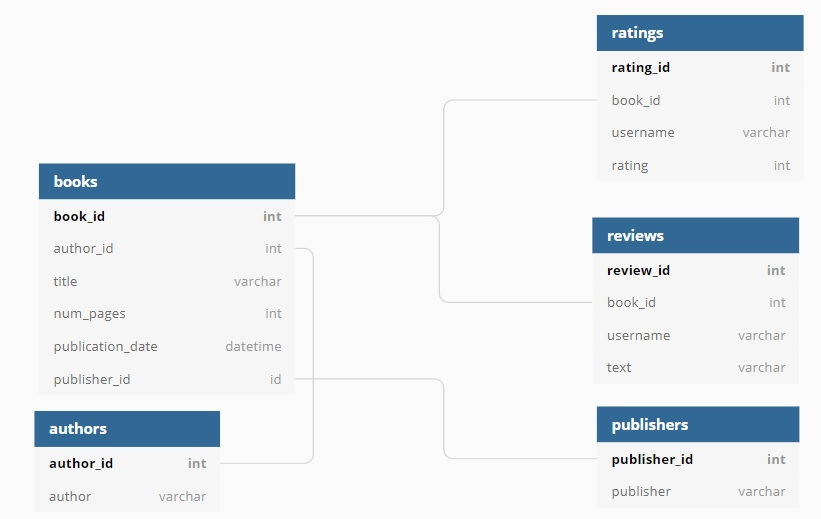


Для того, чтобы проанализировать базу данных вы полним следующие задачи:

* Посчитать, сколько книг вышло после 1 января 2000 года;
* Для каждой книги посчитайть количество обзоров и среднюю оценку;
* Определить издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры;
* Определить автора с самой высокой средней оценкой книг — учитывать только книги с 50 и более оценками;
* Посчитайть среднее количество обзоров от пользователей, которые поставили больше 50 оценок.

# Общая информация о данных

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine

# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
 'pwd': 'Sdf4$2;d-d30pp', # пароль
 'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
 'port': 6432, # порт подключения
 'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
 db_config['pwd'],
 db_config['host'],
 db_config['port'],
 db_config['db'])

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'}) 

In [2]:
def table_info(table):
    
    """ Функция для вывода общей информации о таблице в БД и первых 5 строк таблицы"""
    
    query = '''SELECT * FROM {} LIMIT 5'''.format(table)
    query1 = '''SELECT COUNT (*) FROM {}'''.format(table)
    df = pd.io.sql.read_sql(query, con = engine)
    df_shape_table = pd.io.sql.read_sql(query1, con = engine)
    display (df)
    display (df.info())
    print('\033[1m' +f"Количество строк в таблице {table} составляет {df_shape_table.loc[0, 'count']}")
    print()
    

In [3]:
list = ['books','authors', 'ratings', 'reviews', 'publishers']
for i in list:
    print ('\033[1m' + 'Общая информация о таблице', i)
    print('\033[0m')
    table_info(i)    
        

Общая информация о таблице books



,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           5 non-null      int64 
 1   author_id         5 non-null      int64 
 2   title             5 non-null      object
 3   num_pages         5 non-null      int64 
 4   publication_date  5 non-null      object
 5   publisher_id      5 non-null      int64 
dtypes: int64(4), object(2)
memory usage: 368.0+ bytes


None

Количество строк в таблице books составляет 1000

Общая информация о таблице authors



,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  5 non-null      int64 
 1   author     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

Количество строк в таблице authors составляет 636

Общая информация о таблице ratings



,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   rating     5 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 288.0+ bytes


None

Количество строк в таблице ratings составляет 6456

Общая информация о таблице reviews



,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  5 non-null      int64 
 1   book_id    5 non-null      int64 
 2   username   5 non-null      object
 3   text       5 non-null      object
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


None

Количество строк в таблице reviews составляет 2793

Общая информация о таблице publishers



,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  5 non-null      int64 
 1   publisher     5 non-null      object
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


None

Количество строк в таблице publishers составляет 340



In [4]:
# какие ещё таблицы доступны в базе
query = '''

SELECT *
FROM pg_catalog.pg_tables
WHERE schemaname != 'pg_catalog' AND
      schemaname != 'information_schema';

'''

display(pd.io.sql.read_sql(query, con = engine))


# смотрим на типы столбцов в интересующих таблицах
query = '''
SELECT 
    table_name, 
    column_name, 
    data_type, 
    is_nullable
FROM INFORMATION_SCHEMA.COLUMNS 
WHERE table_name IN ('books', 'authors', 'publishers', 'ratings', 'reviews');
'''

display(pd.io.sql.read_sql(query, con = engine))

,schemaname,tablename,tableowner,tablespace,hasindexes,hasrules,hastriggers,rowsecurity
0,public,orders,praktikum_admin,None,True,False,False,False
1,public,visits,praktikum_admin,None,True,False,False,False
2,public,advertisment_costs,praktikum_admin,None,True,False,False,False
3,public,trip,praktikum_student,None,False,False,False,False
4,public,C:oks,praktikum_student,None,False,False,False,False
5,public,boks,praktikum_student,None,False,False,False,False
6,public,finished_lessons1,praktikum_student,None,True,False,False,False
7,public,finished_lessons2,praktikum_student,None,True,False,False,False
8,public,publishers,praktikum_admin,None,True,False,True,False
9,public,authors,praktikum_admin,None,True,False,True,False


,table_name,column_name,data_type,is_nullable
0,publishers,publisher_id,integer,NO
1,publishers,publisher,text,YES
2,authors,author_id,integer,NO
3,authors,author,text,YES
4,reviews,review_id,integer,NO
5,reviews,book_id,integer,YES
6,reviews,username,text,YES
7,reviews,text,text,YES
8,ratings,rating_id,integer,NO
9,ratings,book_id,integer,YES


# Задача 1. Сколько книг вышло после 1 января 2000 года

На данном шаге выясним количество книг вышедших после 1 января 2020 года.

In [5]:
query = '''


SELECT COUNT(*)
FROM books
WHERE CAST(publication_date AS TIMESTAMP)>=CAST('2000-01-01' AS TIMESTAMP)


'''

df = pd.io.sql.read_sql(query, con = engine)
print('После 01 января 2020 г. вышла {} книга '.format(df.loc[0, 'count']) )


После 01 января 2020 г. вышла 821 книга 


# Задача 2. Количество обзоров и средняя оценка

На данном шаге для каждой книги посчитаем количество обзоров и среднюю оценку

In [6]:
query = '''


SELECT b.title,
       COUNT (DISTINCT rw.review_id), ROUND (avg(r.rating), 2) as R
FROM REVIEWS AS rw
RIGHT OUTER JOIN BOOKS AS b ON rw.book_id=b.book_id
LEFT OUTER JOIN RATINGS AS r ON b.book_id = r.book_id
GROUP BY b.book_id
ORDER BY R DESC

'''

df = pd.io.sql.read_sql(query, con = engine)
df.columns = ['Название', 'Количество обзоров', 'Средний рейтинг']
df

,Название,Количество обзоров,Средний рейтинг
0,Arrows of the Queen (Heralds of Valdemar #1),2,5.00
1,The Walking Dead Book One (The Walking Dead #...,2,5.00
2,Light in August,2,5.00
3,Wherever You Go There You Are: Mindfulness Me...,2,5.00
4,Captivating: Unveiling the Mystery of a Woman'...,2,5.00
...,...,...,...
995,The World Is Flat: A Brief History of the Twen...,3,2.25
996,His Excellency: George Washington,2,2.00
997,Drowning Ruth,3,2.00
998,Junky,2,2.00


# Задача 3. Издательство, которое выпустило наибольшее число книг

На данном шаге определим издательство, которое выпустило наибольшее число книг толще 50 страниц — так мы исключим из анализа брошюры.

In [7]:
query = '''


SELECT p.publisher,
       count(b.book_id)
FROM publishers AS p
JOIN BOOKS AS b ON p.publisher_id=b.publisher_id
WHERE b.num_pages > 50
GROUP BY p.publisher_id
ORDER BY count(b.book_id) DESC
LIMIT 1

'''

df = pd.io.sql.read_sql(query, con = engine)
df.columns = ['Название издательства', 'Количество книг']
df

,Название издательства,Количество книг
0,Penguin Books,42


# Задача 4. Автор с самой высокой средней оценкой книг

На данном шаге определим автора с самой высокой средней оценкой книг. Будем  учитывать только книги с 50 и более оценками;

In [9]:
query = '''


SELECT a.author,
       AVG(r.rating) avg_rating
FROM authors AS a
JOIN books AS b ON a.author_id=b.author_id
JOIN ratings AS r ON b.book_id=r.book_id
WHERE b.book_id IN
    (SELECT b.book_id
     FROM books AS b
     JOIN ratings AS r ON b.book_id=r.book_id
     GROUP BY b.book_id
     HAVING count(r.rating_id)>=50)
GROUP BY a.author
ORDER BY avg_rating desc

LIMIT 1

'''

df = pd.io.sql.read_sql(query, con = engine)
df.columns = ['Автор', 'Средний рейтинг']
df
#print('Автор с самой высокой средней оценкой книг это {} '.format('\033[1m' + df.loc[0, 'Автор']) )
#print ('\033[0m' + '*учитывались книги с >50 оценок')

,Автор,Средний рейтинг
0,J.K. Rowling/Mary GrandPré,4.287097


# Задача 5. Среднее количество обзоров от пользователей

На данном шаге посчитаем среднее количество обзоров от пользователей, которые поставили больше 50 оценок

In [10]:
query = '''

WITH A AS
  (SELECT username,
          count(review_id)
   FROM reviews
   WHERE username in
       (SELECT username
        FROM ratings
        GROUP BY username
        HAVING count(rating_id)>50)
   GROUP BY username)
SELECT round (SUM (COUNT) / COUNT(COUNT), 2) AS AVG
FROM A

'''

df = pd.io.sql.read_sql(query, con = engine)

print ('Среднее количество отзывов среди самых активных пользователей составляет ', df.loc[0, 'avg'])


Среднее количество отзывов среди самых активных пользователей составляет  24.33


# Вывод

Ответили на все поставленные вопросы.